In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['Serial No.'],inplace=True)

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
X=df.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
y=df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
scaled = MinMaxScaler()

In [15]:
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled=scaled.transform(X_test)

In [16]:
X_train_scaled


array([[0.2       , 0.10714286, 0.25      , ..., 0.125     , 0.45512821,
        1.        ],
       [0.44      , 0.46428571, 0.25      , ..., 0.375     , 0.52884615,
        0.        ],
       [0.62      , 0.67857143, 0.5       , ..., 0.75      , 0.65064103,
        1.        ],
       ...,
       [0.36      , 0.64285714, 0.5       , ..., 0.5       , 0.38461538,
        1.        ],
       [0.44      , 0.46428571, 0.5       , ..., 0.5       , 0.39102564,
        1.        ],
       [0.86      , 0.89285714, 0.75      , ..., 0.75      , 0.91666667,
        1.        ]])

In [17]:
model = Sequential()

In [18]:
model.add(Dense(4,input_dim=7,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))

C:\Users\tops\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='mean_squared_error',optimizer='adam')


In [21]:
history=model.fit(X_train_scaled,y_train, epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4034 - val_loss: 1.1980
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1686 - val_loss: 1.0191
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0071 - val_loss: 0.8667
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8880 - val_loss: 0.7381
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7266 - val_loss: 0.6245
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6439 - val_loss: 0.5277
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5050 - val_loss: 0.4562
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4432 - val_loss: 0.3980
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3949 - val_loss: 0.3522
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3406 - val_loss: 0.3155
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3131 - val_loss: 0.2814
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [22]:
history.history

{'loss': [1.364863395690918,
  1.1608245372772217,
  0.9862115979194641,
  0.8374086618423462,
  0.7012864351272583,
  0.5908756256103516,
  0.4979862570762634,
  0.4311218857765198,
  0.38074588775634766,
  0.3389298915863037,
  0.3037947118282318,
  0.26963794231414795,
  0.23716223239898682,
  0.20602460205554962,
  0.17552705109119415,
  0.14690805971622467,
  0.1208999902009964,
  0.09666749835014343,
  0.07638005912303925,
  0.05947079136967659,
  0.0458495169878006,
  0.035423826426267624,
  0.027724746614694595,
  0.02239363268017769,
  0.01910075917840004,
  0.016896633431315422,
  0.015618190169334412,
  0.014805453829467297,
  0.014348104596138,
  0.014011758379638195,
  0.013791712000966072,
  0.013558486476540565,
  0.0133617939427495,
  0.013166671618819237,
  0.012978548184037209,
  0.01279900036752224,
  0.012608937919139862,
  0.012424113228917122,
  0.01224314235150814,
  0.012071148492395878,
  0.011895226314663887,
  0.011722946539521217,
  0.011548660695552826,
  0

In [23]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [24]:
y_pred

array([[0.8731586 ],
       [0.88115346],
       [0.77674294],
       [0.585453  ],
       [0.58491105],
       [0.89324766],
       [0.59710974],
       [0.8176162 ],
       [0.9339786 ],
       [0.8523677 ],
       [0.41913843],
       [0.94001406],
       [0.6033202 ],
       [0.92392796],
       [0.7350543 ],
       [0.6582235 ],
       [0.72646755],
       [0.6214351 ],
       [0.4884138 ],
       [0.7862133 ],
       [0.64971805],
       [1.0078758 ],
       [0.6584445 ],
       [0.49593437],
       [0.8158937 ],
       [0.5882191 ],
       [0.4671831 ],
       [0.82597923],
       [0.7818921 ],
       [0.7979374 ],
       [0.9091033 ],
       [0.7905142 ],
       [0.8598953 ],
       [0.9488989 ],
       [0.66254586],
       [0.5682102 ],
       [0.9309333 ],
       [0.704218  ],
       [0.89874524],
       [0.90376914],
       [0.76450956],
       [0.92497444],
       [0.5886893 ],
       [0.58831215],
       [0.7657048 ],
       [0.80221635],
       [0.8222969 ],
       [0.435

In [25]:
r2_score(y_test,y_pred)

0.7335056787298335

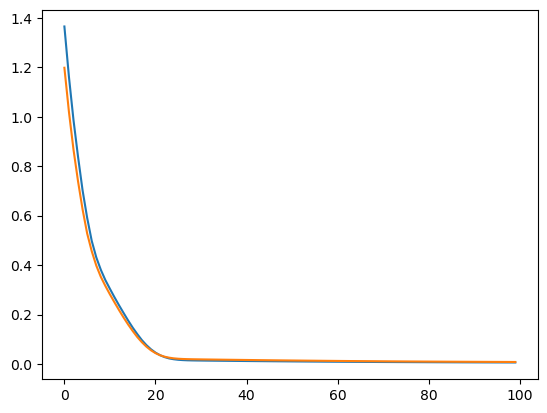

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [28]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [32]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [33]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [34]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [37]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [38]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [39]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [40]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [41]:
X_train.shape

(8000, 11)

In [43]:
scaler=StandardScaler()

In [44]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
model=Sequential()

In [46]:
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


C:\Users\tops\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [50]:
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - loss: 0.6036
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.5033
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.4715
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4491
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.4438
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4321
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.4262
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.4254
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4120  
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4143
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4093
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.4105
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4169
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4002
Epoch 15/100
250/250 ━━━━━━

In [58]:
y_pred=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


In [59]:
y_pred

array([[0.78114444],
       [0.5355245 ],
       [0.78114444],
       ...,
       [0.78114444],
       [0.78114444],
       [0.03657511]], dtype=float32)

In [62]:
y_pred=y_pred.argmax(axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
accuracy_score(y_test,y_pred)

0.804

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

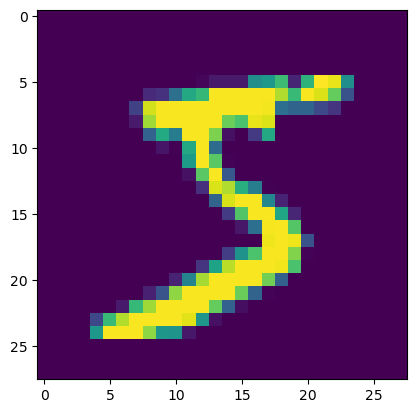

In [7]:
plt.imshow(X_train[0])

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train=X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
model=Sequential()

In [18]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(28,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 28)                  │          21,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 28)                  │             812 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 28)                  │             812 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,894 (93.34 KB)

 Trainable params: 23,894 (93.34 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs = 10, batch_size = 100,validation_split=0.2)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6913 - loss: 1.0102 - val_accuracy: 0.9162 - val_loss: 0.2903
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9259 - loss: 0.2553 - val_accuracy: 0.9368 - val_loss: 0.2146
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9416 - loss: 0.1990 - val_accuracy: 0.9419 - val_loss: 0.2001
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1618 - val_accuracy: 0.9491 - val_loss: 0.1787
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9573 - loss: 0.1417 - val_accuracy: 0.9567 - val_loss: 0.1584
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1262 - val_accuracy: 0.9552 - val_loss: 0.1575
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1181 - val_accuracy: 0.9590 - val_loss: 0.1461
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.1036 - val_accuracy: 0.

In [25]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


In [26]:
y_prob

array([[4.1014300e-05, 2.0375588e-09, 4.9808307e-04, ..., 9.9773216e-01,
        2.5322015e-07, 2.6789645e-05],
       [4.5534148e-06, 6.6248194e-06, 9.9998665e-01, ..., 2.2788482e-10,
        1.2248505e-06, 1.1203925e-13],
       [2.3338466e-06, 9.9421281e-01, 4.7282604e-04, ..., 2.9519859e-03,
        2.0277298e-03, 2.5460886e-05],
       ...,
       [2.2105576e-14, 3.8828345e-09, 2.3935414e-13, ..., 3.4295388e-07,
        3.3358268e-07, 2.4607463e-04],
       [1.3178451e-10, 9.9559809e-09, 2.6437774e-10, ..., 2.0319746e-10,
        5.8782925e-09, 3.1409606e-09],
       [1.2298592e-07, 1.1997806e-16, 1.0210344e-06, ..., 2.1336191e-14,
        1.0139358e-09, 4.0701608e-13]], dtype=float32)

In [27]:
y_pred=y_prob.argmax(axis=1)

In [28]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.9616